In [1]:
import pandas as pd
import numpy as np

In [2]:
#df=pd.read_csv("bikes.csv")

In [3]:
#df.head()

In [4]:
df=pd.read_csv("hour.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
df.shape

(17379, 17)

In [28]:
# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display,HTML

In [29]:
display(df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [31]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [32]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [33]:
df.rename(columns={'instant':'rec_id',"dteday" : "datetime","holiday" : "is_holiday", "workingday" : "is_workingday", "hum" : "humidity", 
                  "mnth":"month","cnt":"total_count","hr":"hour","yr":"year"},inplace=True)

In [34]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
df['datetime']=pd.to_datetime(df['datetime'])

In [36]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [37]:
df.dtypes

rec_id                    int64
datetime         datetime64[ns]
season                    int64
year                      int64
month                     int64
hour                      int64
is_holiday                int64
weekday                   int64
is_workingday             int64
weathersit                int64
temp                    float64
atemp                   float64
humidity                float64
windspeed               float64
casual                    int64
registered                int64
total_count               int64
dtype: object

In [47]:
df['season'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [44]:
df['season']=df.season.astype('category')

In [45]:
df.dtypes


rec_id                    int64
datetime         datetime64[ns]
season                 category
year                      int64
month                     int64
hour                      int64
is_holiday                int64
weekday                   int64
is_workingday             int64
weathersit                int64
temp                    float64
atemp                   float64
humidity                float64
windspeed               float64
casual                    int64
registered                int64
total_count               int64
dtype: object

In [46]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


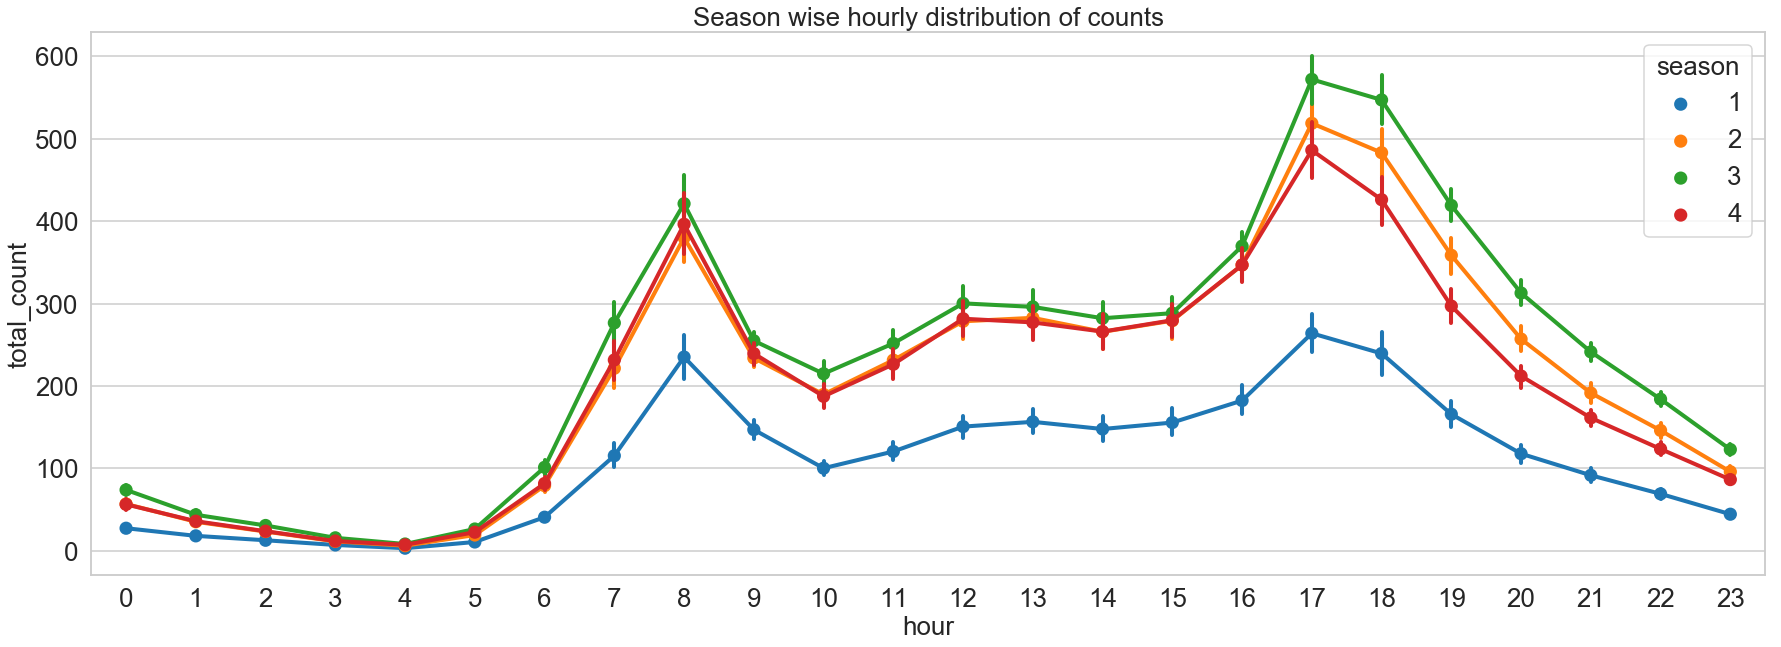

In [54]:
#fig,ax = plt.subplots()
sns.pointplot(data=df,x='hour',y="total_count",hue='season')
plt.title("Season wise hourly distribution of counts")
plt.show()

In [52]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


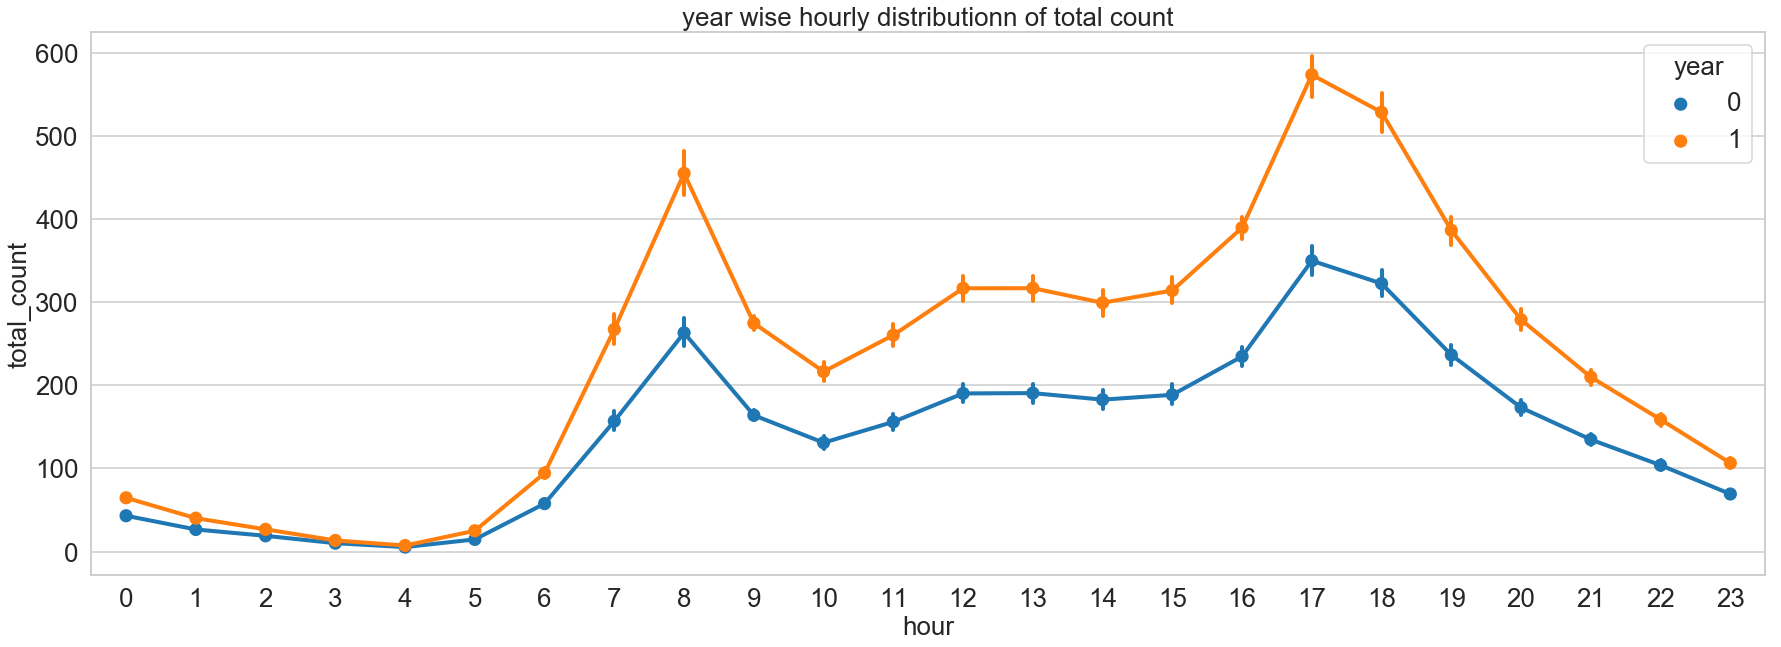

In [56]:
sns.pointplot(data=df,x='hour',y='total_count',hue='year')
plt.title("year wise hourly distributionn of total count")
plt.show()

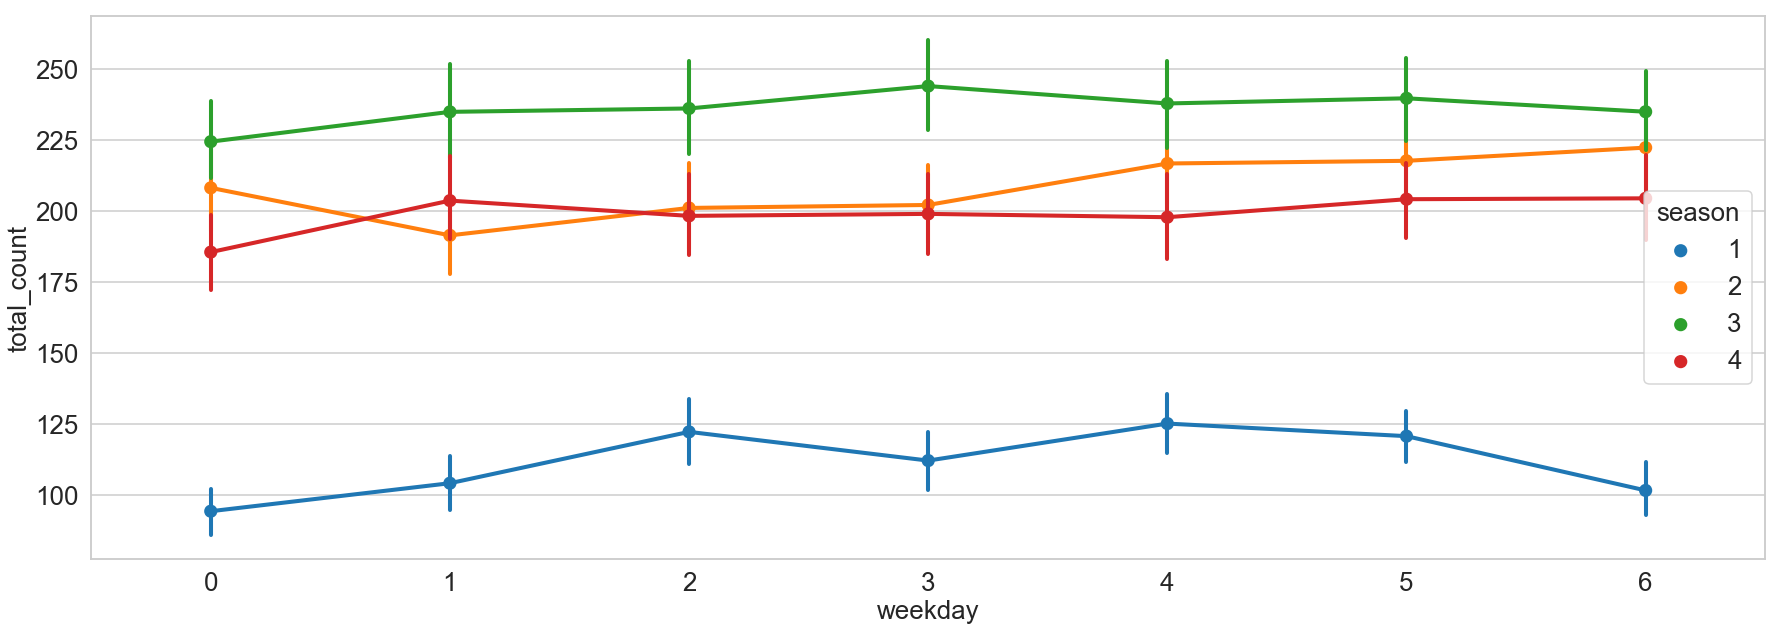

In [57]:
sns.pointplot(data=df,x="weekday",y='total_count',hue='season')
plt.show()

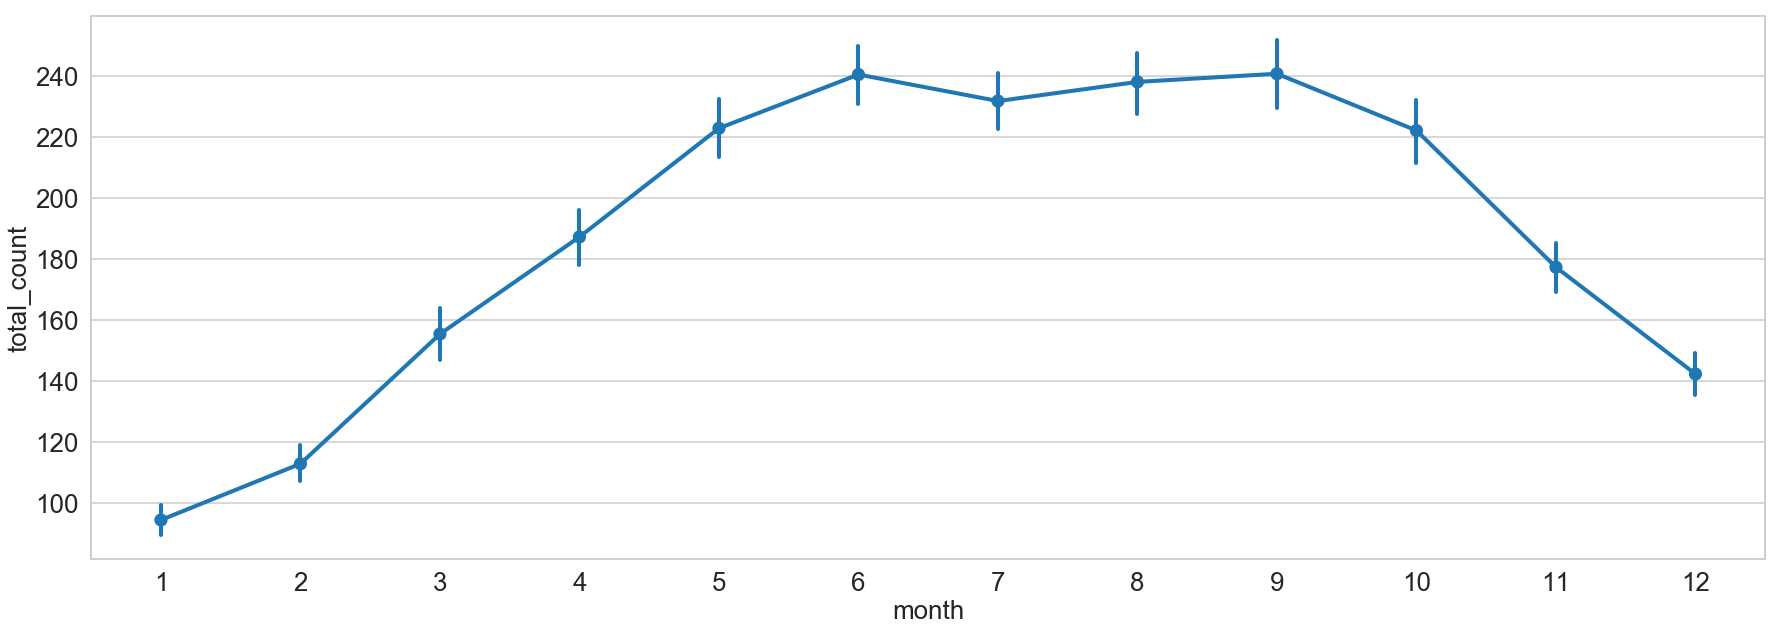

In [61]:
sns.pointplot(data=df,x="month",y="total_count")
plt.show()

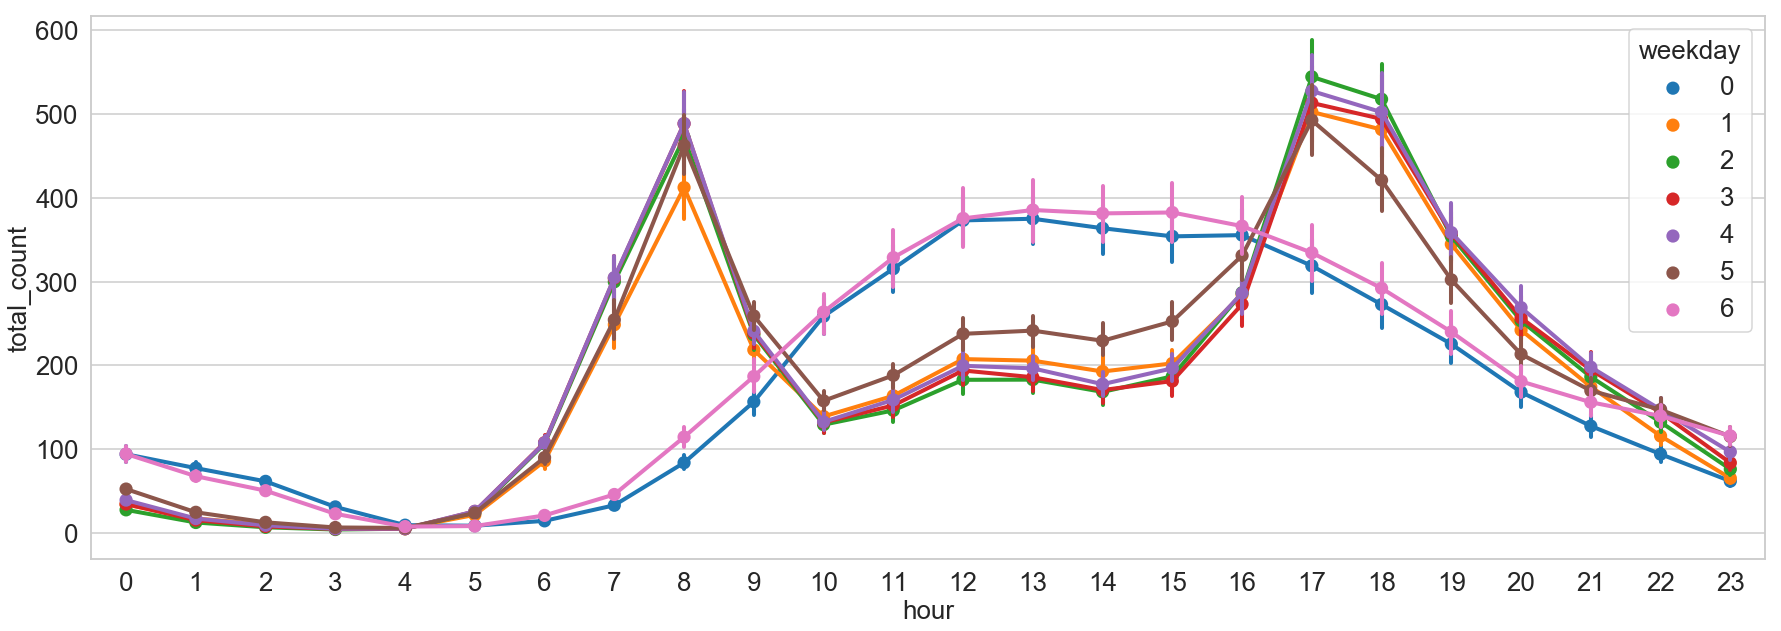

Text(0.5, 1.0, 'weekday wise hourly distribution ')

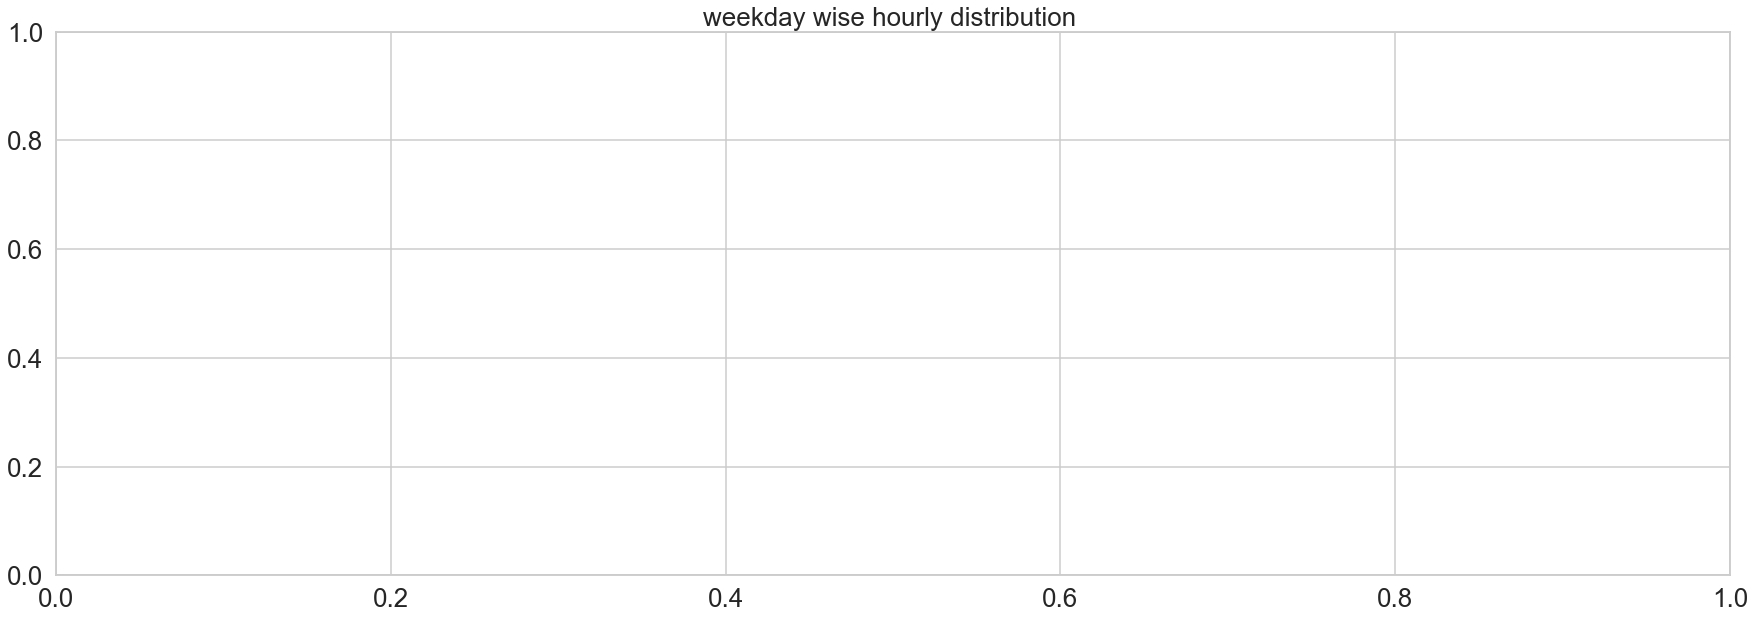

In [64]:
sns.pointplot(data=df,x='hour',y="total_count",hue='weekday')
plt.show()
plt.title("weekday wise hourly distribution ")

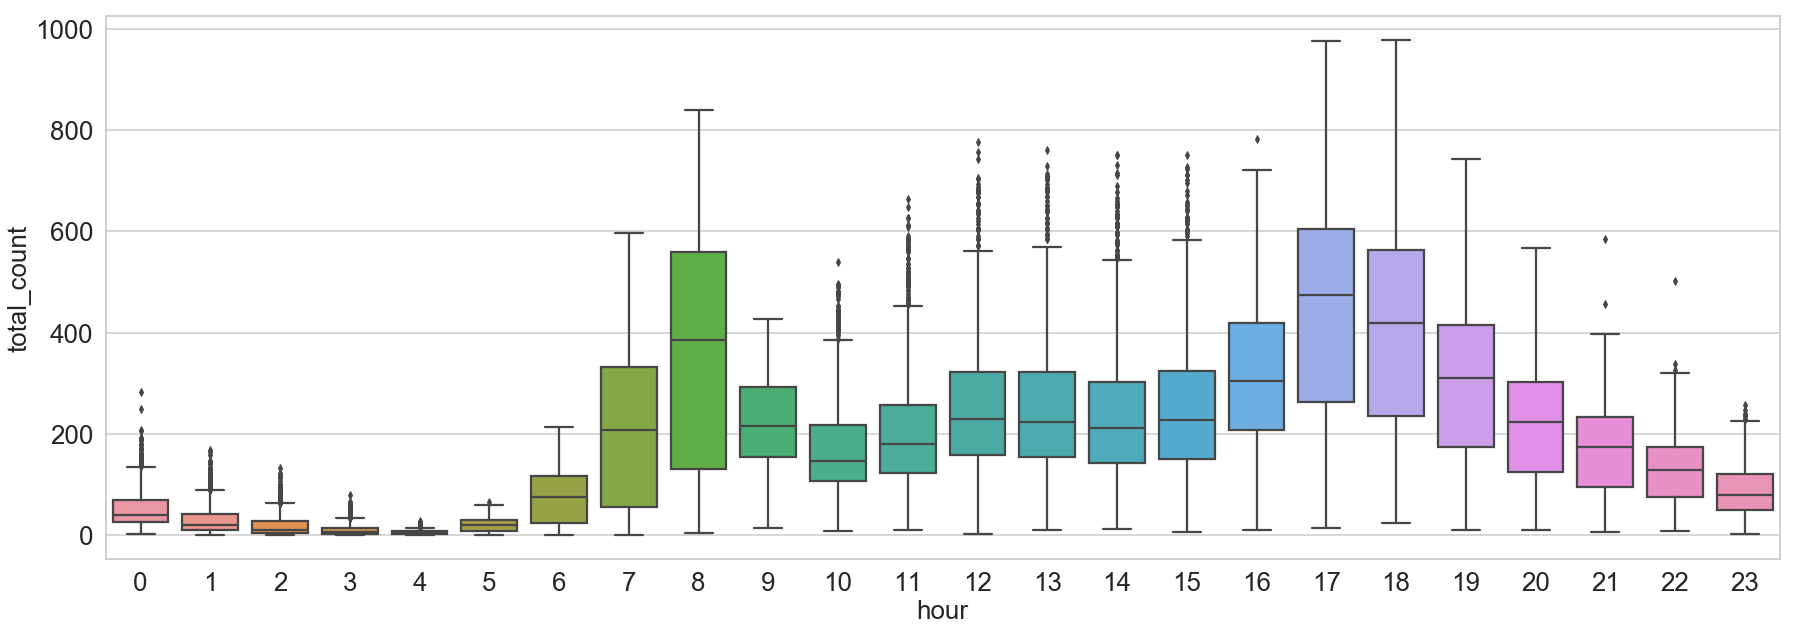

In [66]:
sns.boxplot(data=df,x='hour',y="total_count")
plt.show()

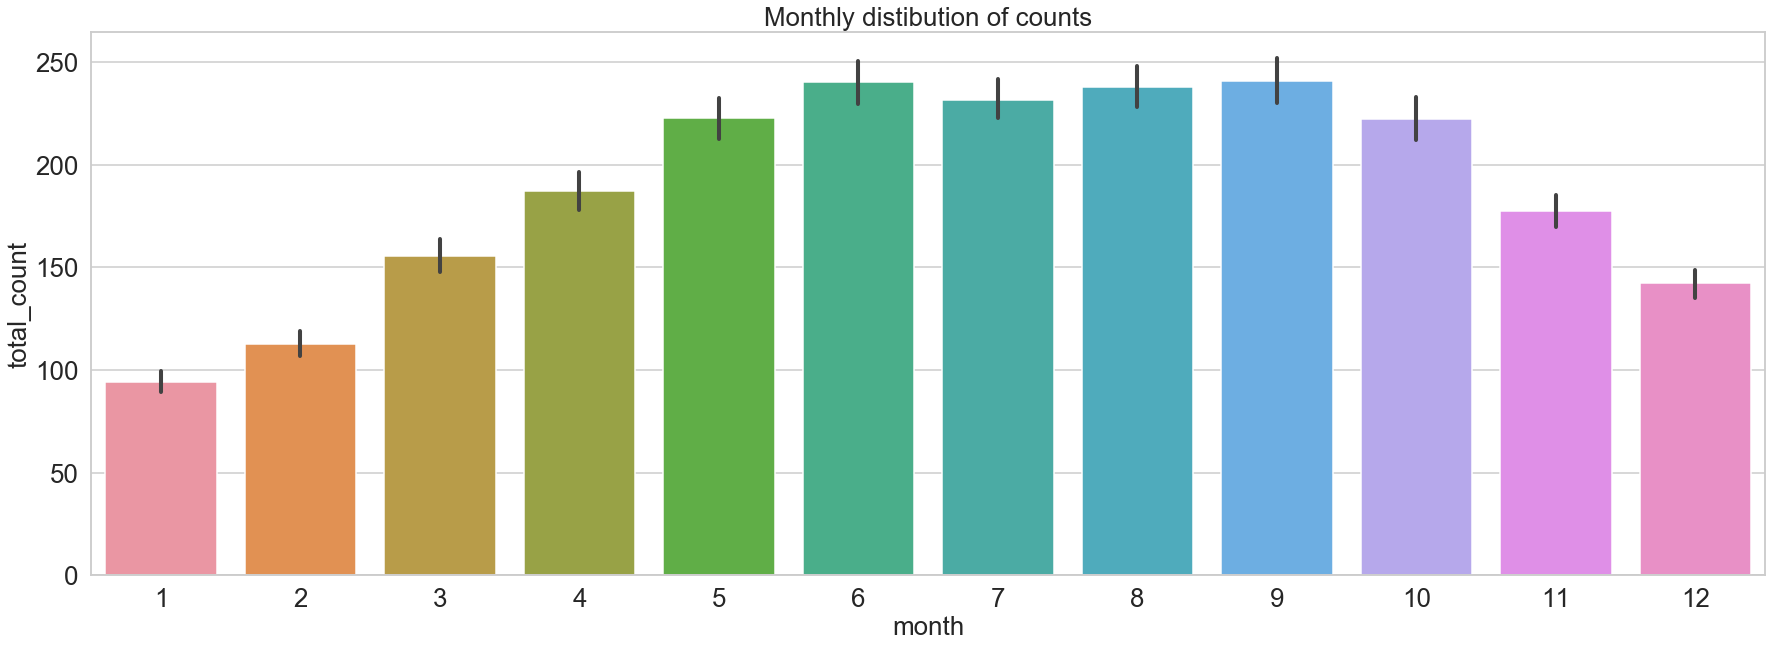

In [68]:
sns.barplot(data=df,x="month",y="total_count")
plt.title("Monthly distibution of counts")
plt.show()

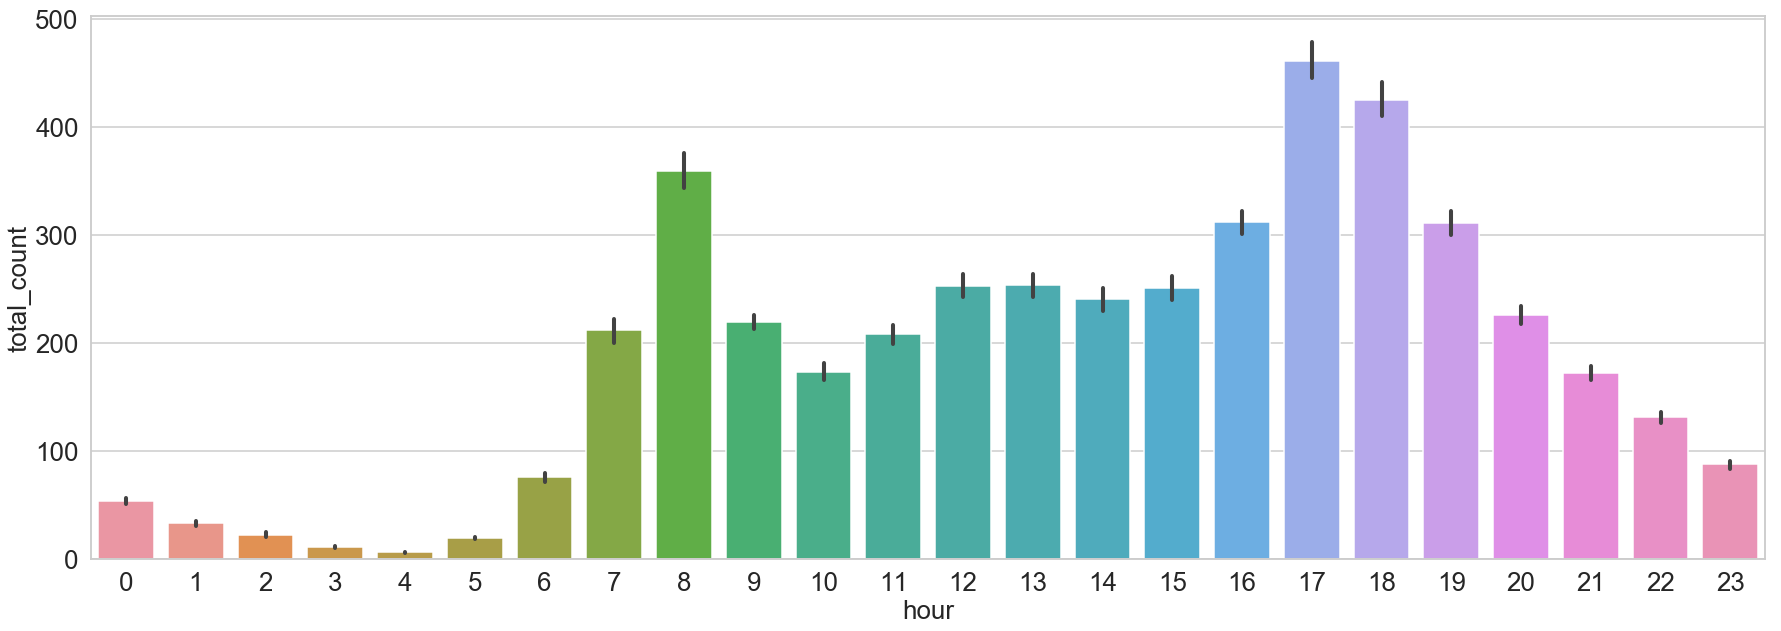

In [69]:
sns.barplot(data=df,x="hour",y="total_count")

In [83]:
#collist=['month','weekday','total_count']
spring=df[df.season==1][['month','weekday','total_count']]
summer=df[df.season==2][['month','weekday','total_count']]
fall=df[df.season==3][['month','weekday','total_count']]
winter=df[df.season==4][['month','weekday','total_count']]

In [84]:
summer.head()

,month,weekday,total_count
1807,3,1,13
1808,3,1,7
1809,3,1,6
1810,3,1,1
1811,3,1,2


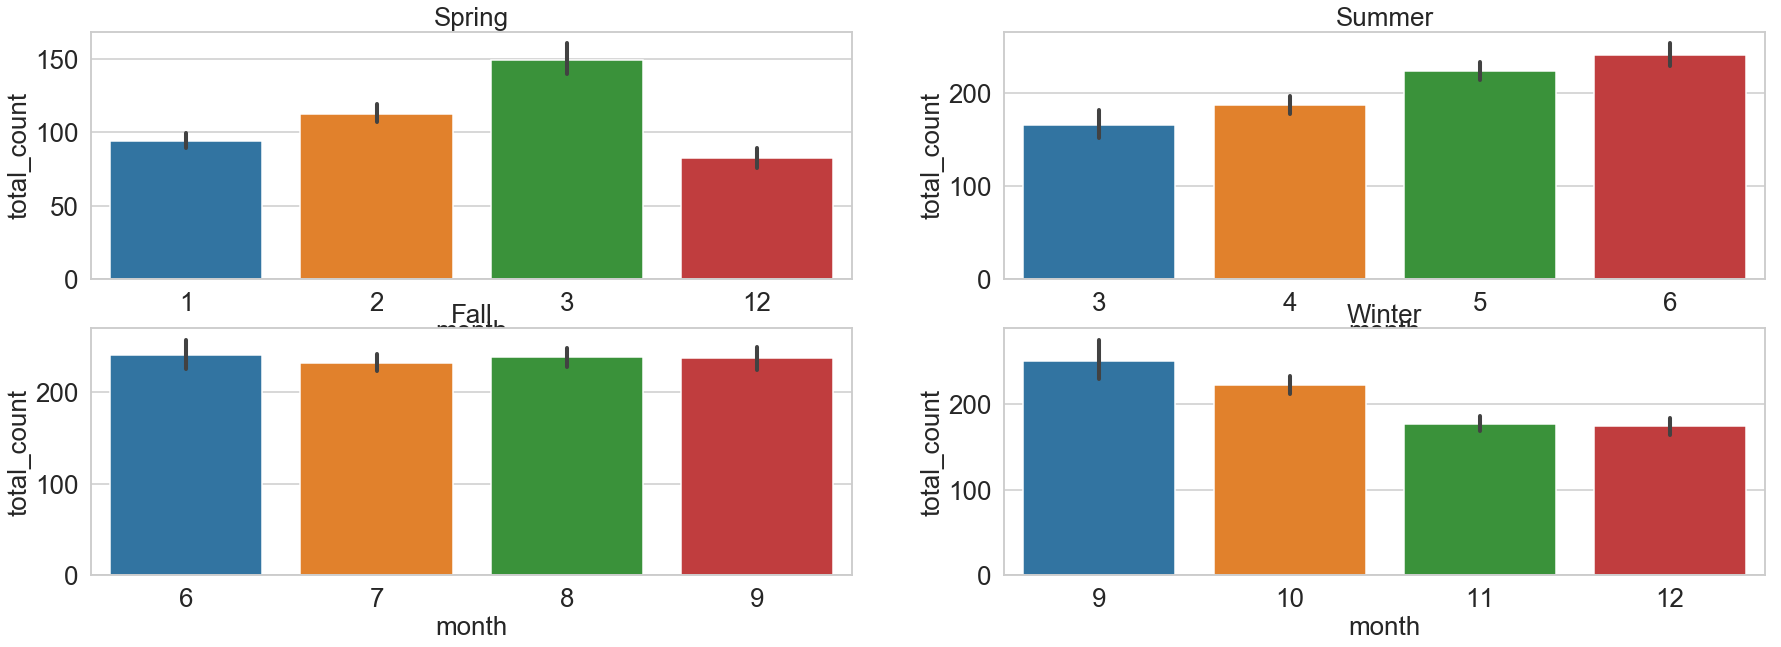

In [88]:
fig,ax=plt.subplots(nrows=2,ncols=2)
sns.barplot(data=spring,x='month',y='total_count',ax=ax[0][0])
ax[0][0].set(title="Spring")

sns.barplot(data=summer,x='month',y='total_count',ax=ax[0][1])
ax[0][1].set(title="Summer")

sns.barplot(data=fall,x='month',y='total_count',ax=ax[1][0])
ax[1][0].set(title="Fall")

sns.barplot(data=winter,x='month',y='total_count',ax=ax[1][1])
ax[1][1].set(title="Winter")

plt.show()

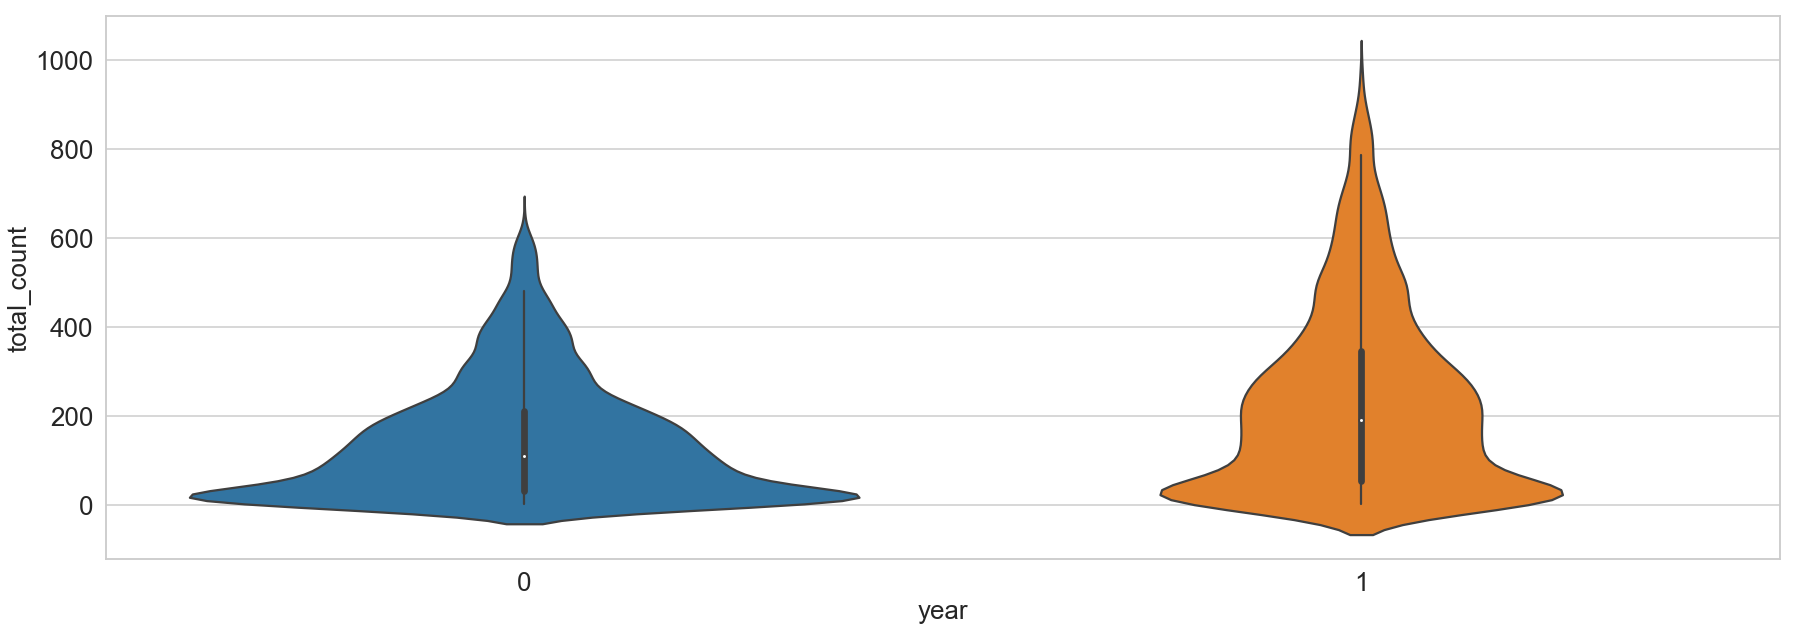

In [89]:
sns.violinplot(data=df,x='year',y='total_count')

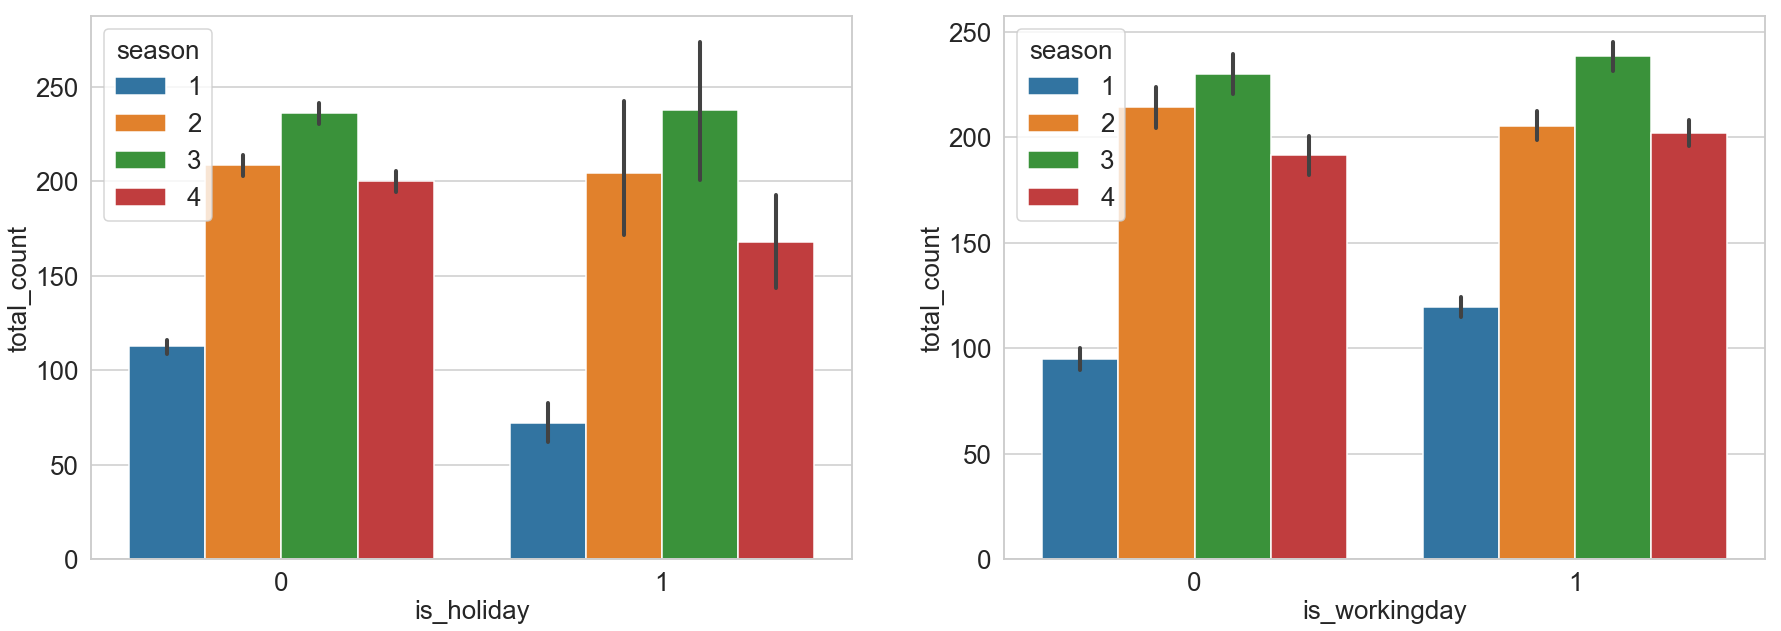

In [92]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.barplot(data=df,x="is_holiday",y="total_count",hue='season',ax=ax1)
sns.barplot(data=df,x="is_workingday",y="total_count",hue='season',ax=ax2)
plt.show()

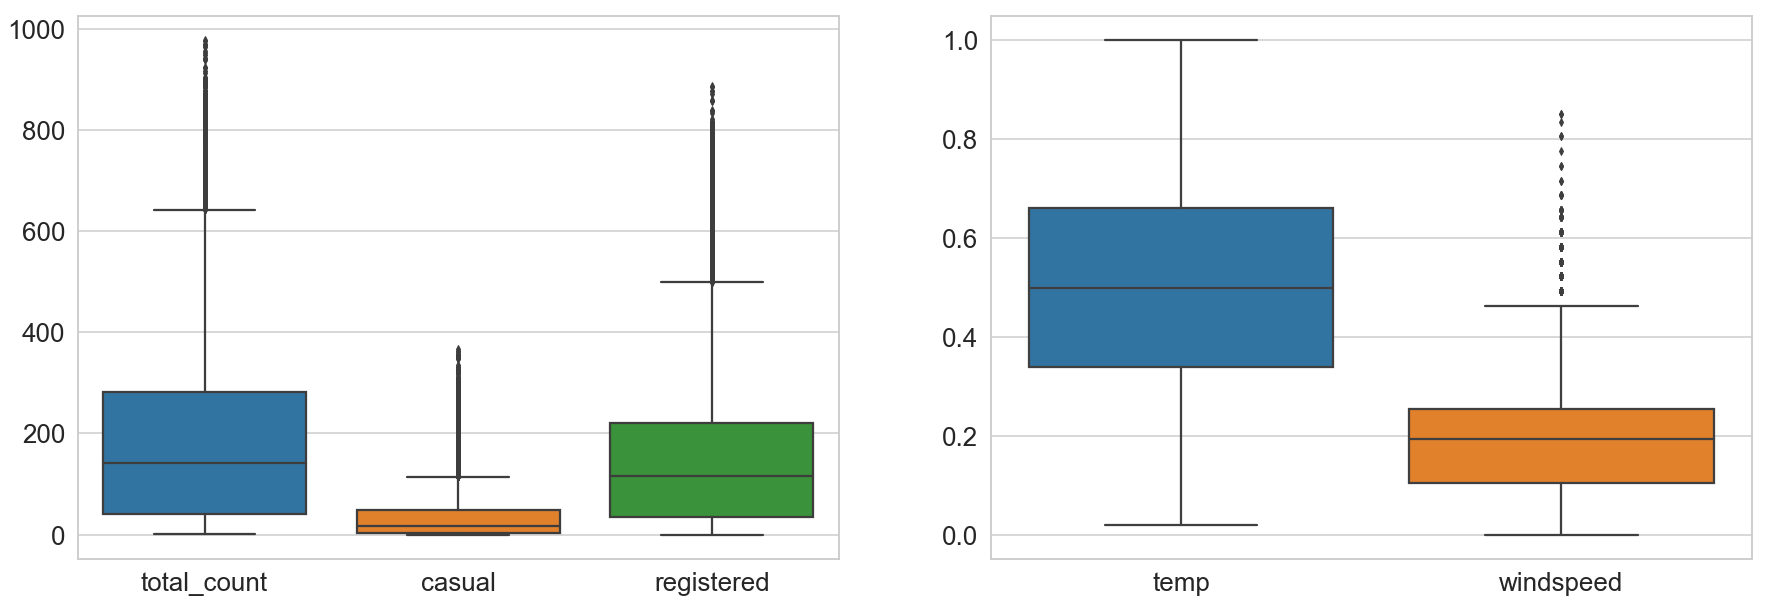

In [98]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
sns.boxplot(data=df[['total_count','casual','registered']],ax=ax1)
sns.boxplot(data=df[['temp','windspeed']],ax=ax2)
plt.show()

In [96]:
dfcorr=df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()

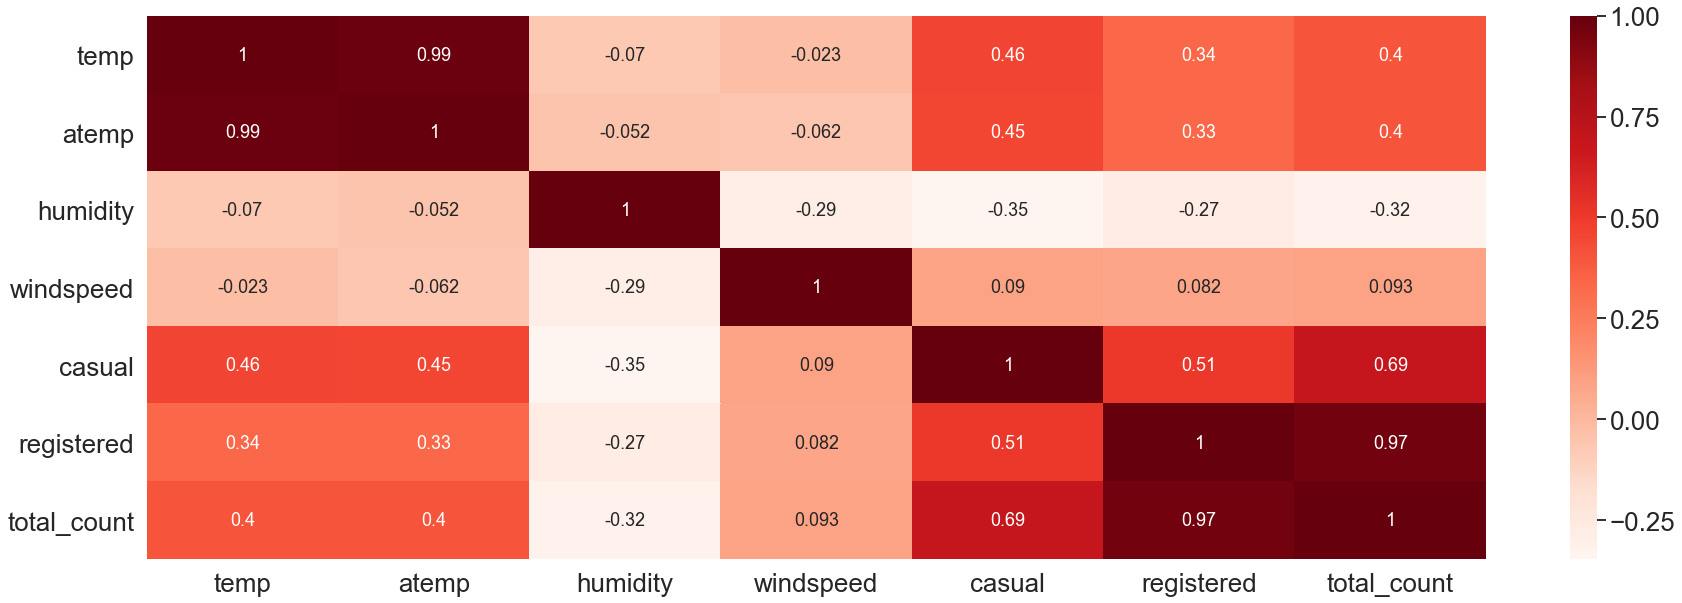

In [97]:
sns.heatmap(dfcorr,cmap="Reds",annot=True)

In [100]:
df.dtypes

rec_id                    int64
datetime         datetime64[ns]
season                 category
year                      int64
month                     int64
hour                      int64
is_holiday                int64
weekday                   int64
is_workingday             int64
weathersit                int64
temp                    float64
atemp                   float64
humidity                float64
windspeed               float64
casual                    int64
registered                int64
total_count               int64
dtype: object

In [101]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [109]:
dfc=df.copy()
dfc.drop('datetime',axis=1,inplace=True)
dfc.head()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [110]:
x=dfc.iloc[:,:-1]
y=dfc.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=47)

In [111]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

1.0

In [112]:
pred=lr.predict(x_test)

In [113]:
r2_score(y_test,pred)

1.0

In [114]:
mean_squared_error(y_test,pred)

8.620225326548576e-22

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [120]:
preddt=dtr.predict(x_test)
r2_score(y_test,preddt)

0.9990907266798313

In [129]:
mean_squared_error(y_test,preddt)

29.282426778242677

In [122]:
import pickle

In [123]:
smod=pickle.dumps(lr)

In [124]:
lmod=pickle.loads(smod)

In [125]:
lmod.predict(x_test)

array([303., 558., 313., ..., 159., 160., 649.])

In [128]:
y_test.values

array([303, 558, 313, ..., 159, 160, 649], dtype=int64)